In [2]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [3]:
zhao = fb[fb.page_name == "趙天麟"]
# 把時間格式轉換
zhao['new_date'] = pd.to_datetime(zhao['created_time_taipei']).dt.date
zhao['post_hour'] = pd.to_datetime(zhao['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
zhao['month_year'] = pd.to_datetime(zhao['new_date']).dt.to_period('M')

zhao.head(1)

<ipython-input-3-71300bb25f4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zhao['new_date'] = pd.to_datetime(zhao['created_time_taipei']).dt.date
<ipython-input-3-71300bb25f4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zhao['post_hour'] = pd.to_datetime(zhao['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-3-71300bb25f4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
1910,109004835824305_2132255086832593,109004835824305,趙天麟,政治人物,【奇聞共享】\n\n「茲因市長人氣居高不下，市府已然成為本市另類的觀光景點，建請觀光局研議於本府四維行政中心1樓中庭設置市長人形立牌供參觀合影，並提供本市各觀光景點宣傳折頁與消費優惠訊息，以提升觀光效益。」\n\n#猜猜看這會是誰在什麼場合的發言\n\n#謝謝李雅慧議員的法案助理宛廷認真準備質詢內容時的發現,NaN,photo,https://www.facebook.com/109004835824305/posts/2132255086832593/,2019-01-15T08:43:50+0000,2019-01-15T16:43:50,...,0,0,0,0,0,79,23,2019-01-15,16,2019-01


In [4]:
zhao[zhao.created_time_taipei == max(zhao.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
2478,109004835824305_2645704752211800,109004835824305,趙天麟,政治人物,#奮戰到最後一刻\n\n【LIVE直播中】\n\n瑞豐大團結趙天麟選前車隊大掃街,趙天麟的直播影片。,video,https://www.facebook.com/skychao6238/videos/2645704752211800/,2020-01-10T11:58:36+0000,2020-01-10T19:58:36,...,0,0,0,0,0,175,39,2020-01-10,19,2020-01


In [5]:
zhao[zhao.created_time_taipei == min(zhao.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
1930,109004835824305_2110945055630263,109004835824305,趙天麟,政治人物,新年快樂🎉\n\n所有的朋友們，新的一年，祝福滿滿！,NaN,photo,https://www.facebook.com/109004835824305/posts/2110945055630263/,2018-12-31T16:24:54+0000,2019-01-01T00:24:54,...,0,0,0,0,0,36,2,2019-01-01,0,2019-01


In [6]:
zhao = zhao.sort_values(by=['like_count'])
zhao

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
2223,109004835824305_2469461533111945,109004835824305,趙天麟,政治人物,NaN,趙天麟新增了 55 張相片。,photo,https://www.facebook.com/skychao6238/photos/a.2469461299778635/2469461533111945/?type=3,2019-08-10T13:24:46+0000,2019-08-10T21:24:46,...,0,0,0,0,0,1,1,2019-08-10,21,2019-08
2152,109004835824305_2374517852606314,109004835824305,趙天麟,政治人物,「親子共讀要從幾歲開始呀？」\n「我的孩子根本坐不住要怎麼親子共讀？」\n\n國民健康署明天中午12點30分來為大家解惑\n請鎖定👉https://pse.is/G6UFJ\n\n#加碼抽獎活動\n#親子共讀,NaN,photo,https://www.facebook.com/109004835824305/posts/2374517852606314/,2019-06-18T10:14:03+0000,2019-06-18T18:14:03,...,0,0,0,0,0,4,2,2019-06-18,18,2019-06
1924,109004835824305_2114970065227762,109004835824305,趙天麟,政治人物,NaN,趙天麟,video,https://www.facebook.com/109004835824305/posts/2114970065227762/,2019-01-03T09:38:57+0000,2019-01-03T17:38:57,...,0,0,0,0,0,3,5,2019-01-03,17,2019-01
1941,109004835824305_2145581478833287,109004835824305,趙天麟,政治人物,雅慧議員當選後首次直播，朋友們一起來為「星願烏克麗麗樂團」加油💪,趙天麟,video,https://www.facebook.com/109004835824305/posts/2145581478833287/,2019-01-24T13:26:15+0000,2019-01-24T21:26:15,...,0,0,0,0,0,0,0,2019-01-24,21,2019-01
2069,109004835824305_2272072186184215,109004835824305,趙天麟,政治人物,🎥直播預告21:00\n如果說今天的大地震嚇了你一跳，那麼重量級優質國片被盜版洩漏，就更是一場智慧財產的震撼！\n\n『盜版影片三不原則』：不看！不點！不散播！\n一起堅持看正版，讓本週日的精采大結局留下完美的句點！\n\n稍後21:00，天麟邀請到幾位朋友，他們正是『與惡』距離最近的一群人，有在追劇的朋友一起來聊聊真實的人生劇場吧。\n\n#這個時間我與餓也滿近的 😜\nhttps://reurl.cc/pK9W8,NaN,photo,https://www.facebook.com/109004835824305/posts/2272072186184215/,2019-04-18T11:26:42+0000,2019-04-18T19:26:42,...,0,0,0,0,0,7,6,2019-04-18,19,2019-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,109004835824305_2617772994947464,109004835824305,趙天麟,政治人物,#謝謝今天所有出席的真勇者\n\n真勇者說的不僅僅是今天特地從台中到高雄為我助選的陳柏惟；說的不僅僅是今天站在台上的高雄市議員們，更是今天前金、新興所有的後援會會長、總幹事、副會長們，他們很多人都是現任里長，在市政府換黨執政下，他們具名並且願意站出來支持我，他們也是真勇者。\n\n我也要特別感謝管碧玲委員，我們的管媽，她是一個有智慧，有氣度的長者，由於選區合併，她在今年3月率先宣布放棄連任，讓天麟可以提早經營選區。相信管媽要以豐富的選戰經驗，帶領我們翻轉高雄，打出一場漂亮的勝仗。\n\n陳柏惟在台上，看到現場這麼多市民朋友的熱情，流下了英雄淚，陳柏惟說天麟有強大意志力，天麟是一個馬拉松跑者，我挑戰100公里超級馬拉松，我要做到的事情一定會做到。\n\n文益議員說天麟的選舉很正向，都在傳遞正能量，不攻擊別人，不做負面文宣。今年這場選戰，讓天麟想起9年前的自己。當時我的競選對手是邱毅，大家都叫他「爆料天王」，是一個強勁的對手。天麟當時決定參選立委，宣布不參選議員連任，全力輔選我們這區的市議員，讓我們民進黨在2010年的議會選舉，在第8選區揮出全壘打。也感謝建盟議員等夥伴，全力輔選，讓天麟挑戰成功。\n\n為了紮根基層，提供最接地氣的服務，天麟推動跟里長設立「聯合服務處」。過去天麟在前新苓共同建立將近100個聯合服務處，也跟各區的資深里長一起合作，培育了許許多多的新好里長。我們也從這些跟里長合作完成許多選民服務，也爭取到不少重大建設。\n \n除了貼近選民，提供優質服務外，天麟在立法院歷任衛環委員會、內政委員會及外交國防委員會，並擔任召委，也被公督盟評為優秀立委。天麟重視國際事務及兩岸議題，曾應美國國務院之邀訪問研究，並到日本慶應大學就國際事務及兩岸問題交換意見跟學習。同時，天麟也曾在民進黨中央黨部擔任過青年部主任、新聞部主任以及小英總統擔任黨主席後兩任中國事務部主任，用國際角度看台海問題，全力協助蔡總統建立國際及兩岸論述。在離選戰倒數78天之際，天麟依舊堅守在外交國防委員會，捍衛F16V戰機的預算及強化國安的法案，替小英總統完成抗中保台的任務。\n \n天麟也要特別感謝許多好朋友出席，永達兄特地來支持我，蔡昌達前副議長特別來關心我的選情，後援總會許文欽總會長是我永遠的後盾，後援總會總幹事陳福明協助今天的所有一切，更要感謝前金後援會會長賴勇村及新興後援會會長謝國男所組織的後援會系統。今天距離選舉還有最後77天，台灣要贏，高雄一定要大贏，高雄第六選區如果大贏，高雄市就可以八仙過海，立委通通過關，拜託大家，跟著天麟一起衝，最後77天，我們一直衝！一起衝！\n\n#一人拉一票台中第二選區陳柏惟\n#感謝管媽3Q哥\n#特別感謝蕭永達出席\n#記得我們的微笑手勢\n#謝謝邁家人TaiwanTeam天粉出任務志工夥伴\n#感謝製作天麟手舉牌氣氛超好\n\n3Q 陳柏惟\n管碧玲 (kuanbiling)\n萬事發達蔡昌達\n煥然一新 簡煥宗\n益起打拚－黃文益\n主婦政治力 李雅慧\n鳳山要紅 林智鴻\n高雄市議員鄭孟洳\n高雄市議員郭建盟\n江瑞鴻\n李喬如\n黃秋媖 高雄市議員\n蕭永達,NaN,photo,https://www.facebook.com/109004835824305/posts/2617772994947464/,2019-10-26T11:54:57+0000,2019-10-26T19:54:57,...,0,0,0,0,0,644,267,2019-10-26,19,2019-10
2439,109004835824305_2691012964290133,109004835824305,趙天麟,政治人物,經過了8年的努力，「壽山自然公園籌備處」終於以「國家自然公園管理處」正式揭牌成立！\n\n「國家公園」是台灣重要的生態標記，但屬於淺山型的都會山區與公園，卻無法在國家公園與一般社區公園做出區隔。2011年內政部擘畫出「國家自然公園」這個層級，在當時的高雄市長陳菊(花媽)爭取下，籌組了「壽山自然公園籌備處」。\n\n經過管碧玲 (kuanbiling)委員及天麟先後在內政委員會的多年爭取，內政部徐國勇部長勇於任事、突破萬難，終在蔡英文 Tsai Ing-wen總統與蘇貞昌院長的力挺下，結束長達8年的籌備，正式誕生。\n\n包括壽山（柴山）、龜山、半屏山等都會淺山，加上高雄都會公園、台中都會公園，都納入「國家自然公園管理處」的管轄範圍，未來服務與研究的量能都將大大提升，是民眾與生態的一大福音。\n\n親自見證這歷史的時刻，備感欣慰！未來，讓我們一起加油💪,NaN,photo,https://www.facebook.com/109004835824305/posts/2691012964290133/,2019-11-28T06:12:47+0000,2019-11-28T14:12:47,...,0,0,0,0,0,402,266,2019-11-28,14,2019-11
2280,109004835824305_2507409332650498,

In [7]:
zhao.reset_index(inplace=True)
zhao

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,2223,109004835824305_2469461533111945,109004835824305,趙天麟,政治人物,NaN,趙天麟新增了 55 張相片。,photo,https://www.facebook.com/skychao6238/photos/a.2469461299778635/2469461533111945/?type=3,2019-08-10T13:24:46+0000,...,0,0,0,0,0,1,1,2019-08-10,21,2019-08
1,2152,109004835824305_2374517852606314,109004835824305,趙天麟,政治人物,「親子共讀要從幾歲開始呀？」\n「我的孩子根本坐不住要怎麼親子共讀？」\n\n國民健康署明天中午12點30分來為大家解惑\n請鎖定👉https://pse.is/G6UFJ\n\n#加碼抽獎活動\n#親子共讀,NaN,photo,https://www.facebook.com/109004835824305/posts/2374517852606314/,2019-06-18T10:14:03+0000,...,0,0,0,0,0,4,2,2019-06-18,18,2019-06
2,1924,109004835824305_2114970065227762,109004835824305,趙天麟,政治人物,NaN,趙天麟,video,https://www.facebook.com/109004835824305/posts/2114970065227762/,2019-01-03T09:38:57+0000,...,0,0,0,0,0,3,5,2019-01-03,17,2019-01
3,1941,109004835824305_2145581478833287,109004835824305,趙天麟,政治人物,雅慧議員當選後首次直播，朋友們一起來為「星願烏克麗麗樂團」加油💪,趙天麟,video,https://www.facebook.com/109004835824305/posts/2145581478833287/,2019-01-24T13:26:15+0000,...,0,0,0,0,0,0,0,2019-01-24,21,2019-01
4,2069,109004835824305_2272072186184215,109004835824305,趙天麟,政治人物,🎥直播預告21:00\n如果說今天的大地震嚇了你一跳，那麼重量級優質國片被盜版洩漏，就更是一場智慧財產的震撼！\n\n『盜版影片三不原則』：不看！不點！不散播！\n一起堅持看正版，讓本週日的精采大結局留下完美的句點！\n\n稍後21:00，天麟邀請到幾位朋友，他們正是『與惡』距離最近的一群人，有在追劇的朋友一起來聊聊真實的人生劇場吧。\n\n#這個時間我與餓也滿近的 😜\nhttps://reurl.cc/pK9W8,NaN,photo,https://www.facebook.com/109004835824305/posts/2272072186184215/,2019-04-18T11:26:42+0000,...,0,0,0,0,0,7,6,2019-04-18,19,2019-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2331,109004835824305_2617772994947464,109004835824305,趙天麟,政治人物,#謝謝今天所有出席的真勇者\n\n真勇者說的不僅僅是今天特地從台中到高雄為我助選的陳柏惟；說的不僅僅是今天站在台上的高雄市議員們，更是今天前金、新興所有的後援會會長、總幹事、副會長們，他們很多人都是現任里長，在市政府換黨執政下，他們具名並且願意站出來支持我，他們也是真勇者。\n\n我也要特別感謝管碧玲委員，我們的管媽，她是一個有智慧，有氣度的長者，由於選區合併，她在今年3月率先宣布放棄連任，讓天麟可以提早經營選區。相信管媽要以豐富的選戰經驗，帶領我們翻轉高雄，打出一場漂亮的勝仗。\n\n陳柏惟在台上，看到現場這麼多市民朋友的熱情，流下了英雄淚，陳柏惟說天麟有強大意志力，天麟是一個馬拉松跑者，我挑戰100公里超級馬拉松，我要做到的事情一定會做到。\n\n文益議員說天麟的選舉很正向，都在傳遞正能量，不攻擊別人，不做負面文宣。今年這場選戰，讓天麟想起9年前的自己。當時我的競選對手是邱毅，大家都叫他「爆料天王」，是一個強勁的對手。天麟當時決定參選立委，宣布不參選議員連任，全力輔選我們這區的市議員，讓我們民進黨在2010年的議會選舉，在第8選區揮出全壘打。也感謝建盟議員等夥伴，全力輔選，讓天麟挑戰成功。\n\n為了紮根基層，提供最接地氣的服務，天麟推動跟里長設立「聯合服務處」。過去天麟在前新苓共同建立將近100個聯合服務處，也跟各區的資深里長一起合作，培育了許許多多的新好里長。我們也從這些跟里長合作完成許多選民服務，也爭取到不少重大建設。\n \n除了貼近選民，提供優質服務外，天麟在立法院歷任衛環委員會、內政委員會及外交國防委員會，並擔任召委，也被公督盟評為優秀立委。天麟重視國際事務及兩岸議題，曾應美國國務院之邀訪問研究，並到日本慶應大學就國際事務及兩岸問題交換意見跟學習。同時，天麟也曾在民進黨中央黨部擔任過青年部主任、新聞部主任以及小英總統擔任黨主席後兩任中國事務部主任，用國際角度看台海問題，全力協助蔡總統建立國際及兩岸論述。在離選戰倒數78天之際，天麟依舊堅守在外交國防委員會，捍衛F16V戰機的預算及強化國安的法案，替小英總統完成抗中保台的任務。\n \n天麟也要特別感謝許多好朋友出席，永達兄特地來支持我，蔡昌達前副議長特別來關心我的選情，後援總會許文欽總會長是我永遠的後盾，後援總會總幹事陳福明協助今天的所有一切，更要感謝前金後援會會長賴勇村及新興後援會會長謝國男所組織的後援會系統。今天距離選舉還有最後77天，台灣要贏，高雄一定要大贏，高雄第六選區如果大贏，高雄市就可以八仙過海，立委通通過關，拜託大家，跟著天麟一起衝，最後77天，我們一直衝！一起衝！\n\n#一人拉一票台中第二選區陳柏惟\n#感謝管媽3Q哥\n#特別感謝蕭永達出席\n#記得我們的微笑手勢\n#謝謝邁家人TaiwanTeam天粉出任務志工夥伴\n#感謝製作天麟手舉牌氣氛超好\n\n3Q 陳柏惟\n管碧玲 (kuanbiling)\n萬事發達蔡昌達\n煥然一新 簡煥宗\n益起打拚－黃文益\n主婦政治力 李雅慧\n鳳山要紅 林智鴻\n高雄市議員鄭孟洳\n高雄市議員郭建盟\n江瑞鴻\n李喬如\n黃秋媖 高雄市議員\n蕭永達,NaN,photo,https://www.facebook.com/109004835824305/posts/2617772994947464/,2019-10-26T11:54:57+0000,...,0,0,0,0,0,644,267,2019-10-26,19,2019-10
609,2439,109004835824305_2691012964290133,109004835824305,趙天麟,政治人物,經過了8年的努力，「壽山自然公園籌備處」終於以「國家自然公園管理處」正式揭牌成立！\n\n「國家公園」是台灣重要的生態標記，但屬於淺山型的都會山區與公園，卻無法在國家公園與一般社區公園做出區隔。2011年內政部擘畫出「國家自然公園」這個層級，在當時的高雄市長陳菊(花媽)爭取下，籌組了「壽山自然公園籌備處」。\n\n經過管碧玲 (kuanbiling)委員及天麟先後在內政委員會的多年爭取，內政部徐國勇部長勇於任事、突破萬難，終在蔡英文 Tsai Ing-wen總統與蘇貞昌院長的力挺下，結束長達8年的籌備，正式誕生。\n\n包括壽山（柴山）、龜山、半屏山等都會淺山，加上高雄都會公園、台中都會公園，都納入「國家自然公園管理處」的管轄範圍，未來服務與研究的量能都將大大提升，是民眾與生態的一大福音。\n\n親自見證這歷史的時刻，備感欣慰！未來，讓我們一起加油💪,NaN,photo,https://www.facebook.com/109004835824305/posts/2691012964290133/,2019-11-28T06:12:47+0000,...,0,0,0,0,0,402,266,2019-11-28,14,2019-11
610,2280,109004835824305_2507409332650498,109004835824305,趙天麟,政治人物,#奇蹟似的放晴了\n#5000個大小朋友的感動\n\n仲夏夜的序曲\n兒童歡樂的笑聲\n第九年的高雄樂活節，我們從鼓山區開始。\n\n選區整併後，鼓山、鹽埕、苓雅、前金、新興變成一個大家庭，這是我首次邀請紙風車劇團

結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [8]:
doc_names = range(len(zhao)) #管碧玲有幾篇文章
doc_names

range(0, 613)

In [9]:
import numpy as np
zhao = zhao.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(zhao['message'])
zhao_docs = pd.DataFrame(columns=['jieba_results'])
zhao_docs['jieba_results'] = zhao_docs['jieba_results'].astype('str')

In [10]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yangs\AppData\Local\Temp\jieba.cache
Loading model cost 1.251 seconds.
Prefix dict has been built successfully.


['「', '親子', '共讀', '要', '從', '幾歲', '開始', '呀', '？', '」', '\n', '「', '我', '的', '孩子', '根本', '坐不住', '要', '怎麼', '親子', '共讀', '？', '」', '\n', '\n', '國民', '健康', '署', '明天', '中午', '12', '點', '30', '分來', '為', '大家', '解惑', '\n', '請鎖定', '👉', 'https', ':', '/', '/', 'pse', '.', 'is', '/', 'G6UFJ', '\n', '\n', '#', '加碼', '抽獎', '活動', '\n', '#', '親子', '共讀']


In [11]:
words = jieba.lcut(text_list[612], cut_all = False)
print(words)

['#', '萬人', '拚場', '挺小英', '\n', '#', '感謝', '超過', '萬名', '市民', '朋友', '到場', '展現', '高雄人', '的', '氣勢', '與', '決心', '\n', '#', '戰頭功', '拚頭名', '第六', '選區', '要', '在', '高雄', '幫小英', '拿下', '最高', '票', '\n', '\n', '天麟', '在', '這有', '滿滿', '的', '感謝', '與', '感動', '，', '感謝', '超過', '萬名', '的', '高雄鄉', '親來', '到', '天麟', '競選', '總部', '成立', '的', '會場', '，', '也', '感謝', '由', '許文欽', '總會長', '所', '率領', '的', '鼓山', '、', '鹽', '埕', '、', '前金', '、', '新興', '、', '苓', '雅', '、', '婦女', '、', '勞工', '、', '跑團', '所有', '後', '援會', '的', '幹部們', '。', '\n', '\n', '天公', '疼高雄', '，', '前', '兩天', '還在', '下雨', '，', '昨天', '就', '放晴', '了', '，', '也', '因為', '大家', '的', '熱情', '，', '讓', '天氣', '沒有', '這麼', '的', '寒冷', '。', '看看', '現場', '超過', '一萬人', '的', '氣勢', '，', '也', '讓', '蔡', '英文', '總統', '看到', '我們', '的', '熱情', '。', '\n', '\n', '昨天', '現場', '的', '這一萬人會', '讓', '我', '永遠記', '在', '心中', '，', '讓', '我永遠', '感謝', '，', '讓', '我永遠', '記起', '這份', '感動', '。', '現在', '就', '請', '大家', '來', '聽', '一個', '中生代', '的', '天麟', '對', '大家', '的', '報告', '。', '\n', '\n', '我', '的', '第三', '個', '小孩'

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [24]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    zhao_docs = zhao_docs.append(s, ignore_index=True)#每次的斷詞結果都加回kuan_docs

In [25]:
zhao_docs

,jieba_results
0,
1,親子 共讀 要 從 幾歲 開始 呀 我 的 孩子 根本 坐不住 要 怎麼 親子 共讀 國民 健康 署 明天 中午 點 分來 為 大家 解惑 請鎖定 👉 / / . / # 加碼 抽獎 活動 # 親子 共讀
2,
3,雅慧議員 當選 後 首次 直播 朋友 們 一起 來 為 星願 烏克麗麗樂團 加油 💪
4,🎥 直播 預告 如果 說 今天 的 大 地震 嚇了 你 一 跳 那麼 重量 級 優質 國片 被 盜版 洩漏 就 更是 一場 智慧 財產 的 震撼 盜版 影片 三 不 原則 不看 不點 不 散播 一起 堅持 看 正版 讓 本 週日 的 精采 大結局 留下 完美 的 句點 稍 後 天麟 邀請 到 幾位 朋友 他們 正是 與 惡 距離 最近 的 一群 人 有 在 追劇 的 朋友 一起 來 聊聊 真實 的 人生 劇場 吧 。 # 這個 時間 我 與 餓 也 滿近 的 😜 / / . /
...,...
1221,# 謝謝 今天 所有 出席 的 真 勇者 真 勇者 說 的 不僅僅 是 今天 特地 從台 中到 高雄為 我助 選 的 陳 柏惟 說 的 不僅僅 是 今天 站 在 台上 的 高雄市 議員們 更是 今天 前金 新興 所有 的 後 援會會長 總幹事 副會長 們 他們 很多 人 都 是 現任 里 長 在 市政府 換黨 執政下 他們 具名 並且 願意 站 出來 支持 我 他們 也 是 真 勇者 。 我 也 要 特別 感謝 管碧玲 委員 我們 的 管媽 她 是 一個 有 智慧 有氣度 的 長 者 由 於 選區合 併 她 在 今年 月 率先 宣布 放棄 連任 讓 天麟 可以 提早 經營 選區 。 相信 管媽 要 以 豐富 的 選戰 經驗 帶領 我們 翻 轉高雄 打出 一場 漂亮 的 勝仗 。 陳 柏惟 在 台上 看到 現場 這麼 多 市民 朋友 的 熱情 流下 了 英雄 淚 陳 柏惟說 天麟 有 強大 意志力 天麟 是 一個 馬拉松 跑者 我 挑戰 公里 超級 馬拉松 我要 做到 的 事情 一定 會 做到 。 文益 議員 說 天麟 的 選舉 很 正向 都 在 傳遞 正 能量 不 攻擊別 人 不 做 負面 文宣 。 今年 這場 選戰 讓 天麟 想起 年前 的 自己 。 當時 我 的 競選 對 手 是 邱毅 大家 都 叫 他 爆料 天王 是 一個 強勁 的 對 手 。 天麟 當時 決定 參選 立委 宣布 不 參選議員 連任 全力 輔選 我們 這區 的 市議員 讓 我們 民進 黨 在 年 的 議會 選舉 在 第 選區 揮出 全壘 打 。 也 感謝 建盟 議員 等 夥伴 全力 輔選 讓 天麟 挑戰 成功 。 為 了 紮 根基 層 提供 最 接地 氣的 服務 天麟 推動 跟 里 長 設立 聯合 服務 處 。 過去 天麟 在 前 新苓 共同 建立 將近 個 聯合 服務 處 也 跟 各區 的 資深里長 一起 合作 培育 了 許許 多多 的 新 好 里 長 。 我們 也 從 這些 跟 里 長 合作 完成 許多 選民服務 也 爭取 到 不少 重大 建設 。 除了 貼近 選民 提供 優質 服務 外 天麟 在 立法院 歷任 衛環 委員 會 內 政委 員會 及 外交 國防 委員 會 並擔 任召委 也 被 公督盟 評為 優秀 立委 。 天麟 重視 國際 事務及 兩岸 議題 曾應 美國 國務院 之 邀訪問 研究 並到 日本 慶應 大學 就 國際 事務及 兩岸 問題 交換 意見 跟 學習 。 同時 天麟 也 曾 在 民進 黨 中央 黨部擔 任過 青年 部 主任 新聞部 主任 以及 小英總統 擔任 黨 主席 後 兩任 中國 事務部 主任 用國際 角度看 台海 問題 全力 協助 蔡總統 建立 國際及 兩岸 論述 。 在 離 選戰 倒數 天之際 天麟 依舊 堅守 在 外交 國防 委員 會 捍衛 戰機 的 預算及 強化 國安 的 法案 替 小英總統 完成 抗 中保 台 的 任務 。 天麟 也 要 特別 感謝 許多 好 朋友 出席 永達兄 特地 來 支持 我 蔡昌達 前 副 議長 特別 來 關心 我 的 選情 後 援 總會 許文欽 總會長 是 我永遠 的 後 盾 後 援 總會 總幹事 陳 福明 協助 今天 的 所有 一切 更要 感謝 前 金後援 會會長 賴勇村 及 新 興後援 會會長 謝國 男 所 組織 的 後 援會 系統 。 今天 距離 選舉 還有 最 後 天 台灣 要贏 高雄 一定 要大贏 高雄 第六 選區 如果 大贏 高雄市 就 可以 八仙 過海 立委 通通 過關 拜 託 大家 跟 著 天麟 一起 衝 最 後 天 我們 一直 衝 一起 衝 # 一人拉 一票 台 中 第二 選區 陳 柏惟 # 感謝 管媽 哥 # 特別 感謝 蕭永達 出席 # 記得 我們 的 微笑 手勢 # 謝謝邁 家人 天粉 出任 務志 工夥伴 # 感 謝 製 作 天 麟 手 舉 牌 氣 氛 超 好 陳 柏惟 管碧玲 萬事 發達 蔡昌達 煥然 一新 簡煥宗 益起 打 拚 黃 文益 主婦 政治 力 李雅慧 鳳山 要紅 林智鴻 高雄市 議員 鄭孟 洳 高雄市 議員 郭建盟 江瑞鴻 李喬如 黃 秋 媖 高雄市 議員 蕭永達
1222,經過 了 年 的 努力 壽山 自然 公園 籌備 處 終於以 國家 自然 公園 管理 處 正式 揭牌 成立 國家 公園 是 台灣 重要 的 生態 標記 但屬 於 淺山型 的 都 會 山區 與 公園 卻 無法 在 國家 公園 與 一般 社區 公園 做出 區隔 。 年 內政部 擘 畫出 國家 自然 公園 這個 層級 在 當時 的 高雄市 長 陳 菊 花媽 爭取 下 籌組 了 壽山 自然 公園 籌備 處 。 經過 管碧玲 委員 及 天麟 先後在 內 政委 員會 的 多年 爭取 內政部 徐國勇 部長 勇 於 任事 突破 萬難 終在 蔡英文 - 總統 與 蘇貞昌院 長 的 力 挺 下 結束 長 達 年 的 籌備 正式 誕生 。 包括 壽山 柴山 龜山 半屏山 等 都 會 淺山 加上 高雄 都 會 公園 台中 都 會 公園 都 納入 國家 自然 公園 管理 處 的 管轄範圍 未來 服務 與 研究 的 量 能 都將 大大 提升 是民眾 與 生態 的 一大 福音 。 親自見證 這歷史 的 時刻 備感 欣慰 未來 讓 我們 一起 加油 💪
1223,# 奇 蹟 似的 放晴 了 # 個 大小 朋友 的 感動 仲夏夜 的 序曲 兒童 歡樂 的 笑 聲 第九年 的 高雄樂 活節 我們 從 鼓山 區 開始 。 選區整 併 後 鼓山 鹽埕 苓 雅 前金 新興 變成 一個 大家庭 這是 我 首次 邀請 紙風車 劇團 來 到 鼓山 區美麗 的 中山 國小 是 我獻給 鼓山 區的 小朋友 開學 的 第一 個大禮 。 首先 要 感謝 天父 爸爸 連日 的 下雨 在 今天 奇 蹟 式 的 放晴 了 因為 天父 爸爸 是 最 疼 愛 小朋友 的 會 讓 超過 位大 朋友 小朋友 在 最舒服 的 天氣 下欣賞 表演 。 感謝 中山 國小 蕭木川 校長 提供 這麼 好 的 場地給 大家 一個 美麗 的 夜晚 。 過去 蕭木川 校長 在 文府 國小 服務 時 我 也 同樣 邀請 過紙 風車 劇團 在 文府 國小 演出 。 蕭校 長 跟 我 說 美麗 的 家長 會長 黃 小姐 一直 希望 中山 國小 的 小朋友 鼓山 區的 小朋友 也 可以 享受 到 這麼 優質 的 表演 。 所以 跟 校長 報告 我們 完成 了 這個 期待 。 我們 要獻給 大家 的 禮物 的 不 只 這些 龍水里 新任 的 初學霖 里 長 及 簡煥宗議員 李喬 如議員 告訴 我 中山 國小 是 周邊 里民 學童 重要 的 運動場 所 希望 我能 幫 他們 爭取 預算 重整 綜合 運動場 所 。 我 也 向 大家 報告 我爭 取到 教育部 的 專案 補助 萬 完成 這個 任務 。 感謝 一直 陪著 我們 完成 夢想 的 橄欖枝 基金 會 也 特別 感謝 李泰宗 柯珀 汝 董事 對紙 風車 的 支持 他們 長期 資助 紙風車 讓 這麼 優質 的 表演 可以 一直 下去 因為 有 你 們 才 會 有 今晚 的 活動 。 我 發起 的 高雄樂 活節 已經 連續 九年 的 時間 在 苓 雅 前金 新興區 帶來 無數個 表演 給苓 雅 前金 新興 的 小朋友 今年 開始 我們 要 讓 鼓山 鹽埕 區的 小朋友 第一 哩路 就 從 藝術 開始 。 最 後 我要 借用 各位 的 雙手 給紙 風車 一個 熱情 的 掌聲 。 因為 紙風車 為 了 孩子 不管 多遠 不管 多 偏鄉 他 都 會 在 他們 樓下 表演 給他 們 看 。 最近 紙風車 在 台 中 受 了 一點 委屈 希望 高雄 的 朋友 用熱情 的 掌 聲獻給 帶來 美好 活動 的 紙風車 。 會 後 合照 側拍 在 這裡 喔 來 找找看 有 沒 有 入鏡 吧 / / . /
1224,# 用 選票 表達 高雄人 的 憤怒 # 將韓 留在 高雄 罷免 才能 成立 # 一月 十一日 出來 投票 吧 趙 天麟 昨 邀請 高雄 十位 議員同 站 路口 全力 為小英 拉票 衝百萬票 持續 為罷 韓暖身 呼籲 市民 務必 出來 投票 告訴 落 跑 市長 高雄人 有 多 憤怒 趙 天麟 表示 罷韓 行動 第一 階段 提議 已送 進中 選會 約 需一個 月 審查 時間 才 進入 第二 階段 連署 預計 一月 二十六日 後 才 會展 開連署 行動 如何 延續 罷韓 表達 高雄人 意志 唯有 讓 小英 在 高雄 得票 數衝

In [26]:
zhao['jieba_results'] = zhao_docs
zhao_post = zhao[['new_date','message','jieba_results','like_count']]
zhao_post


,new_date,message,jieba_results,like_count
0,2019-08-10,,,29
1,2019-06-18,「親子共讀要從幾歲開始呀？」\n「我的孩子根本坐不住要怎麼親子共讀？」\n\n國民健康署明天中午12點30分來為大家解惑\n請鎖定👉https://pse.is/G6UFJ\n\n#加碼抽獎活動\n#親子共讀,親子 共讀 要 從 幾歲 開始 呀 我 的 孩子 根本 坐不住 要 怎麼 親子 共讀 國民 健康 署 明天 中午 點 分來 為 大家 解惑 請鎖定 👉 / / . / # 加碼 抽獎 活動 # 親子 共讀,70
2,2019-01-03,,,84
3,2019-01-24,雅慧議員當選後首次直播，朋友們一起來為「星願烏克麗麗樂團」加油💪,雅慧議員 當選 後 首次 直播 朋友 們 一起 來 為 星願 烏克麗麗樂團 加油 💪,122
4,2019-04-18,🎥直播預告21:00\n如果說今天的大地震嚇了你一跳，那麼重量級優質國片被盜版洩漏，就更是一場智慧財產的震撼！\n\n『盜版影片三不原則』：不看！不點！不散播！\n一起堅持看正版，讓本週日的精采大結局留下完美的句點！\n\n稍後21:00，天麟邀請到幾位朋友，他們正是『與惡』距離最近的一群人，有在追劇的朋友一起來聊聊真實的人生劇場吧。\n\n#這個時間我與餓也滿近的 😜\nhttps://reurl.cc/pK9W8,🎥 直播 預告 如果 說 今天 的 大 地震 嚇了 你 一 跳 那麼 重量 級 優質 國片 被 盜版 洩漏 就 更是 一場 智慧 財產 的 震撼 盜版 影片 三 不 原則 不看 不點 不 散播 一起 堅持 看 正版 讓 本 週日 的 精采 大結局 留下 完美 的 句點 稍 後 天麟 邀請 到 幾位 朋友 他們 正是 與 惡 距離 最近 的 一群 人 有 在 追劇 的 朋友 一起 來 聊聊 真實 的 人生 劇場 吧 。 # 這個 時間 我 與 餓 也 滿近 的 😜 / / . /,150
...,...,...,...,...
608,2019-10-26,#謝謝今天所有出席的真勇者\n\n真勇者說的不僅僅是今天特地從台中到高雄為我助選的陳柏惟；說的不僅僅是今天站在台上的高雄市議員們，更是今天前金、新興所有的後援會會長、總幹事、副會長們，他們很多人都是現任里長，在市政府換黨執政下，他們具名並且願意站出來支持我，他們也是真勇者。\n\n我也要特別感謝管碧玲委員，我們的管媽，她是一個有智慧，有氣度的長者，由於選區合併，她在今年3月率先宣布放棄連任，讓天麟可以提早經營選區。相信管媽要以豐富的選戰經驗，帶領我們翻轉高雄，打出一場漂亮的勝仗。\n\n陳柏惟在台上，看到現場這麼多市民朋友的熱情，流下了英雄淚，陳柏惟說天麟有強大意志力，天麟是一個馬拉松跑者，我挑戰100公里超級馬拉松，我要做到的事情一定會做到。\n\n文益議員說天麟的選舉很正向，都在傳遞正能量，不攻擊別人，不做負面文宣。今年這場選戰，讓天麟想起9年前的自己。當時我的競選對手是邱毅，大家都叫他「爆料天王」，是一個強勁的對手。天麟當時決定參選立委，宣布不參選議員連任，全力輔選我們這區的市議員，讓我們民進黨在2010年的議會選舉，在第8選區揮出全壘打。也感謝建盟議員等夥伴，全力輔選，讓天麟挑戰成功。\n\n為了紮根基層，提供最接地氣的服務，天麟推動跟里長設立「聯合服務處」。過去天麟在前新苓共同建立將近100個聯合服務處，也跟各區的資深里長一起合作，培育了許許多多的新好里長。我們也從這些跟里長合作完成許多選民服務，也爭取到不少重大建設。\n \n除了貼近選民，提供優質服務外，天麟在立法院歷任衛環委員會、內政委員會及外交國防委員會，並擔任召委，也被公督盟評為優秀立委。天麟重視國際事務及兩岸議題，曾應美國國務院之邀訪問研究，並到日本慶應大學就國際事務及兩岸問題交換意見跟學習。同時，天麟也曾在民進黨中央黨部擔任過青年部主任、新聞部主任以及小英總統擔任黨主席後兩任中國事務部主任，用國際角度看台海問題，全力協助蔡總統建立國際及兩岸論述。在離選戰倒數78天之際，天麟依舊堅守在外交國防委員會，捍衛F16V戰機的預算及強化國安的法案，替小英總統完成抗中保台的任務。\n \n天麟也要特別感謝許多好朋友出席，永達兄特地來支持我，蔡昌達前副議長特別來關心我的選情，後援總會許文欽總會長是我永遠的後盾，後援總會總幹事陳福明協助今天的所有一切，更要感謝前金後援會會長賴勇村及新興後援會會長謝國男所組織的後援會系統。今天距離選舉還有最後77天，台灣要贏，高雄一定要大贏，高雄第六選區如果大贏，高雄市就可以八仙過海，立委通通過關，拜託大家，跟著天麟一起衝，最後77天，我們一直衝！一起衝！\n\n#一人拉一票台中第二選區陳柏惟\n#感謝管媽3Q哥\n#特別感謝蕭永達出席\n#記得我們的微笑手勢\n#謝謝邁家人TaiwanTeam天粉出任務志工夥伴\n#感謝製作天麟手舉牌氣氛超好\n\n3Q 陳柏惟\n管碧玲 (kuanbiling)\n萬事發達蔡昌達\n煥然一新 簡煥宗\n益起打拚－黃文益\n主婦政治力 李雅慧\n鳳山要紅 林智鴻\n高雄市議員鄭孟洳\n高雄市議員郭建盟\n江瑞鴻\n李喬如\n黃秋媖 高雄市議員\n蕭永達,# 謝謝 今天 所有 出席 的 真 勇者 真 勇者 說 的 不僅僅 是 今天 特地 從台 中到 高雄為 我助 選 的 陳 柏惟 說 的 不僅僅 是 今天 站 在 台上 的 高雄市 議員們 更是 今天 前金 新興 所有 的 後 援會會長 總幹事 副會長 們 他們 很多 人 都 是 現任 里 長 在 市政府 換黨 執政下 他們 具名 並且 願意 站 出來 支持 我 他們 也 是 真 勇者 。 我 也 要 特別 感謝 管碧玲 委員 我們 的 管媽 她 是 一個 有 智慧 有氣度 的 長 者 由 於 選區合 併 她 在 今年 月 率先 宣布 放棄 連任 讓 天麟 可以 提早 經營 選區 。 相信 管媽 要 以 豐富 的 選戰 經驗 帶領 我們 翻 轉高雄 打出 一場 漂亮 的 勝仗 。 陳 柏惟 在 台上 看到 現場 這麼 多 市民 朋友 的 熱情 流下 了 英雄 淚 陳 柏惟說 天麟 有 強大 意志力 天麟 是 一個 馬拉松 跑者 我 挑戰 公里 超級 馬拉松 我要 做到 的 事情 一定 會 做到 。 文益 議員 說 天麟 的 選舉 很 正向 都 在 傳遞 正 能量 不 攻擊別 人 不 做 負面 文宣 。 今年 這場 選戰 讓 天麟 想起 年前 的 自己 。 當時 我 的 競選 對 手 是 邱毅 大家 都 叫 他 爆料 天王 是 一個 強勁 的 對 手 。 天麟 當時 決定 參選 立委 宣布 不 參選議員 連任 全力 輔選 我們 這區 的 市議員 讓 我們 民進 黨 在 年 的 議會 選舉 在 第 選區 揮出 全壘 打 。 也 感謝 建盟 議員 等 夥伴 全力 輔選 讓 天麟 挑戰 成功 。 為 了 紮 根基 層 提供 最 接地 氣的 服務 天麟 推動 跟 里 長 設立 聯合 服務 處 。 過去 天麟 在 前 新苓 共同 建立 將近 個 聯合 服務 處 也 跟 各區 的 資深里長 一起 合作 培育 了 許許 多多 的 新 好 里 長 。 我們 也 從 這些 跟 里 長 合作 完成 許多 選民服務 也 爭取 到 不少 重大 建設 。 除了 貼近 選民 提供 優質 服務 外 天麟 在 立法院 歷任 衛環 委員 會 內 政委 員會 及 外交 國防 委員 會 並擔 任召委 也 被 公督盟 評為 優秀 立委 。 天麟 重視 國際 事務及 兩岸 議題 曾應 美國 國務院 之 邀訪問 研究 並到 日本 慶應 大學 就 國際 事務及 兩岸 問題 交換 意見 跟 學習 。 同時 天麟 也 曾 在 民進 黨 中央 黨部擔 任過 青年 部 主任 新聞部 主任 以及 小英總統 擔任 黨 主席 後 兩任 中國 事務部 主任 用國際 角度看 台海 問題 全力 協助 蔡總統 建立 國際及 兩岸 論述 。 在 離 選戰 倒數 天之際 天麟 依舊 堅守 在 外交 國防 委員 會 捍衛 戰機 的 預算及 強化 國安 的 法案 替 小英總統 完成 抗 中保 台 的 任務 。 天麟 也 要 特別 感謝 許多 好 朋友 出席 永達兄 特地 來 支持 我 蔡昌達 前 副 議長 特別 來 關心 我 的 選情 後 援 總會 許文欽 總會長 是 我永遠 的 後 盾 後 援 總會 總幹事 陳 福明 協助 今天 的 所有 一切 更要 感謝 前 金後援 會會長 賴勇村 及 新 興後援 會會長 謝國 男 所 組織 的 後 援會 系統 。 今天 距離 選舉 還有 最 後 天 台灣 要贏 高雄 一定 要大贏 高雄 第六 選區 如果 大贏 高雄市 就 可以 八仙 過海 立委 通通 過關 拜 託 大家 跟 著 天麟 一起 衝 最 後 天 我們 一直 衝 一起 衝 # 一人拉 一票 台 中 第二 選區 陳 柏惟 # 感謝 管媽 哥 # 特別 感謝 蕭永達 出席 # 記得 我們 的 微笑 手勢 # 謝謝邁 家人 天粉 出任 務志 工夥伴 # 感 謝 製 作 天 麟 手 舉 牌 氣 氛 超 好 陳 柏惟 管碧玲 萬事 發達 蔡昌達 煥然 一新 簡煥宗 益起 打 拚 黃 文益 主婦 政治 力 李雅慧 鳳山 要紅 林智鴻 高雄市 議員 鄭孟 洳 高雄市 議員 郭建盟 江瑞鴻 李喬如 黃 秋 媖 高雄市 議員 蕭永達,19978
609,2019-11-28,經過了8年的努力，「壽山自然公園

In [27]:
import matplotlib.pyplot as plt

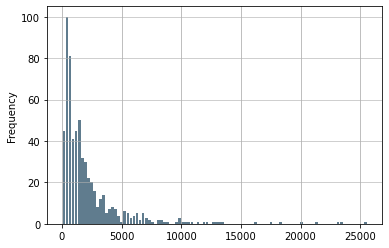

In [28]:
commutes = zhao_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [29]:
temp = zhao_post[(zhao_post['like_count'] <= 10000) & (zhao_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
127,2019-09-18,大家覺得韓國瑜接下來會⋯,大家 覺得 韓國瑜 接下 來會 ⋯,502
128,2019-01-20,2009年，志偉是我青年部幹部，我們一起赴屏東救災；2019年，志偉是立委補選候選人，我北上陪他到菜市場拉票。\n\n#補選第一戰全台都在看何志偉凍蒜,年 志偉 是 我 青年 部幹部 我們 一起 赴 屏東 救災 年 志偉 是 立委 補選候 選人 我 北上 陪 他 到 菜市 場 拉票 。 # 補選 第一 戰全台 都 在 看 何志偉凍 蒜,504
129,2019-04-24,一起！騎出去\n\n天麟參與鹽埕國小小鐵人活動，與小朋友一起騎單車,一起 騎 出去 天麟 參 與 鹽埕 國小 小鐵人 活動 與 小朋友 一起 騎 單車,505
130,2019-05-31,今天早上，天麟邀請天才鋼琴美少女巫熹芸到國會進行獨奏會，演奏過這麼多大型曲目的熹芸，特別喜歡蕭邦的作品，高難度的技巧及細膩的情感詮釋，總是讓熹芸在演奏時樂在其中。今天她特別為我們準備了三首蕭邦的曲目，分別是，降A大調圓舞曲、C小調夜曲，以及前奏曲24首中，熹芸特別挑選了7個曲風較不同的曲目來彈奏。\n\n熹芸14歲獲得國際首獎後，又考上美國茱莉亞音樂學院的預科，原先家人擔心沒有經費到國外求學，但在天麟發起的橄欖枝基金會的獨家贊助下，得以圓夢，今年共獲得9間音樂學院及3家學科學校的錄取通知，這是相當難能可貴的成績。\n\n今天也特別感謝，立法院長蘇嘉全的出席，蘇院長說熹芸才14歲就在國際大獎上發光發熱，是新一代的台灣之光，今天聽到她的演奏，果然令人印象深刻。\n\n雖然只有短短20分鐘，但是大家都享受了一場美好的音樂饗宴，希望未來漫長的路，有我們的加油打氣，熹芸可以在世界的舞台上繼續發光發熱。\n\n民視新聞 https://youtu.be/64MpP0L2vsE\n東森新聞 https://youtu.be/YwEKoiUENvA\n\n#今天全家一起北上為熹芸加油\n#高雄阿諾也有來喔,今天 早上 天麟 邀請 天才 鋼琴 美少女 巫熹 芸 到 國會 進行 獨奏會 演奏 過這麼 多 大型 曲目 的 熹芸 特別 喜歡 蕭邦 的 作品 高難度 的 技巧 及細膩 的 情感 詮釋 總是 讓 熹芸 在 演奏 時樂 在 其中 。 今天 她 特別 為 我們 準備 了 三首 蕭邦 的 曲目 分別 是 降 大調圓 舞曲 小調 夜曲 以及 前奏曲 首中 熹芸 特別 挑選 了 個曲風 較 不同 的 曲目 來彈 奏 。 熹芸 歲 獲得 國際 首獎 後 又 考上 美國茱莉亞 音樂學院 的 預科 原先 家人 擔心 沒有 經費 到 國外 求學 但 在 天麟 發起 的 橄欖枝 基金 會 的 獨家 贊助 下 得以 圓夢 今年 共 獲得 間 音樂學院 及 家學 科學校 的 錄取 通知 這是 相當 難能 可貴 的 成績 。 今天 也 特別 感謝 立法院 長 蘇嘉全 的 出席 蘇院長 說熹 芸 才 歲 就 在 國際大獎 上 發光 發熱 是 新一代 的 台灣 之光 今天 聽到 她 的 演奏 果然 令人 印象 深刻 。 雖然 只有 短短 分鐘 但是 大家 都 享受 了 一場 美好 的 音樂 饗 宴 希望 未來 漫長 的 路 有 我們 的 加油 打氣 熹芸 可以 在 世界 的 舞台 上 繼續 發光 發熱 。 民視 新聞 / / . / 東森新聞 / / . / # 今天 全家 一起 北上 為熹 芸 加油 # 高雄 阿諾 也 有 來 喔,507
131,2020-01-01,新年快樂🎆《一起！2.0山海河港市公益路跑》今天下午三點準時登場！！\n\n讓我們健康又安全的跑，以下幾件事情一定要特別強調：\n\n《報到時間》\n2020年1月1日(三)下午13：30→【鼓山區七賢國中】全面啟動\n\n《報到帳篷》\n大高雄跑團報到：認明【桃紅色】跑團報名報到帳篷\n伊貝特報名報到：認明【鮮綠色】伊貝特報名報到帳篷\n\n《領取號碼布》\n大高雄跑團：個人報出跑團名稱與大名領取【桃紅色】跑團號碼布\n伊貝特報名：個人秀出報名成功截圖領取【鮮綠色】伊貝特報名號碼布\n\n《大會開始》\n2020年1月1日(三)下午14：30→【全勤主持人-鳳山慢跑協會楊明道理事長】\n\n《配速員配速》\n一起！2.0是健康路跑，不是競速賽事，請跟著配速員7-8分/公里最舒服速度一起！前進。\n\n特別⚠️注意⚠️ 很重要所以說三次\n(跑在配速員前面先回到終點跑友，大會將不提供一起！2.0特仕款跑服換領服務喔！)\n(跑在配速員前面先回到終點跑友，大會將不提供一起！2.0特仕款跑服換領服務喔！)\n(跑在配速員前面先回到終點跑友，大會將不提供一起！2.0特仕款跑服換領服務喔！)\n\n《一起！2.0一起！出發》\n15：00→一起！2.0鳴槍起跑,新年 快樂 🎆 《 一起 . 山海 河港 市 公益 路 跑 今天下午 三點 準時 登場 讓 我們 健康 又 安全 的 跑 以下 幾件 事情 一定 要 特別 強調 《 報到 時間 年 月 日 三 下午 → 鼓山 區七賢 國中 全面 啟動 《 報到 帳篷 大高雄 跑 團報 到 認明 桃紅色 跑團 報名 報到 帳篷 伊貝特 報名 報到 認明 鮮綠色 伊貝特 報名 報到 帳篷 《 領取號 碼布 大高雄 跑團 個 人 報出 跑 團名 稱 與 大名 領取 桃紅色 跑 團號 碼布 伊貝特 報名 個 人秀出 報名 成功 截圖 領取 鮮綠色 伊貝特報 名號 碼布 《 大會 開始 年 月 日 三 下午 → 全勤 主持人 - 鳳山 慢跑 協會 楊明 道理 事長 《 配速員 配速 一起 . 是 健康 路 跑 不是 競速賽 事 請 跟 著 配速員 - 分 / 公里 最舒服 速度 一起 前進 。 特別 ⚠ ️ 注意 ⚠ ️ 很 重要 所以 說 三次 跑 在 配速員 前面 先回到 終點 跑友 大會將 不 提供 一起 . 特仕款 跑 服換領 服務 喔 跑 在 配速員 前面 先回到 終點 跑友 大會將 不 提供 一起 . 特仕款 跑 服換領 服務 喔 跑 在 配速員 前面 先回到 終點 跑友 大會將 不 提供 一起 . 特仕款 跑 服換領 服務 喔 《 一起 . 一起 出發 → 一起 . 鳴槍 起跑,510
...,...,...,...,...
589,2019-10-13,#高雄是多元又繽紛的城市\n\n高雄市是一個新住民的大城市，新住民的人數高達六萬人，是全台灣第二高的地方。所以今天民進黨中央黨部婦女部選擇高雄，作為南台灣新住民市集巡迴的第一站，是非常有意義的一件事。\n\n天麟要特別介紹高雄青連線的市議員，他們分別是前金、新興、苓雅的黃文益益起打拚－黃文益；鳳山的林智鴻鳳山要紅 林智鴻；左營、楠梓的李雅慧主婦政治力 李雅慧；三民的鄭孟洳高雄市議員鄭孟洳；大崗山區的黃秋媖黃秋媖；仁大鳥大的江瑞鴻江瑞鴻，他們特別來到現場，就是要體現對新住民的支持。他們都是新科議員，上任後特別在連任七屆的#李喬如議員的指導下，在市議會提案要求高雄市政府設置新住民委員會，來保障新住民的權益，也獲得當時競選市長陳其邁 陳其邁 Chen Chi-Mai的認同。\n\n而這些東協國家的姐妹來到台灣之後，在這裡落地生根，舉凡我們的飲食文化，也到處充滿了多元的風味。在就業與就學的市場，有越來越多新住民及新台灣之子與我們一起共事，更直接地參與公共事務進到市議會，進到立法院，在政府的各個部門發光發熱。\n\n特別在蔡英文總統上任後，積極推動新南向政策，讓這些東協國家，成為台灣投資、商務、觀光往來的新熱點。天麟本身也是台灣泰國國會議員友好協會的會長，有許多的交流都是負責人，所以藉此機會特別跟雪娥理事長、珍妮副理事長及所有的新住民兄弟姊妹報告，有事情請儘量吩咐我，天麟永遠都會是新住民最強力的後盾。\n\n今天所在的南華商圈，本來就是特色商圈，在陳雪娥理事長、許珍妮副理事長、陳志勇執行長、楊福順里長及高雄市東協經貿文化交流協會努力下，從今年8月就開始營運東協假日市集，結合移工創造人潮，打造東協一條街 ，商品多元豐富。\n\n我們在這裡特別拜託大家，選舉剩下最後九十天，天麟認為蔡英文總統是對新住民、對東協國家最友善的總統，我們幫蔡英文拉票，讓蔡英文高票連任，然後邀請她來到我們的南華商圈逛街！\n\n#蔡英文總統是最支持新住民及東協國家的總統\n#新住民美食你最愛吃哪一道\n#天麟的青木瓜沙拉很不錯喔,# 高雄 是 多元 又繽紛 的 城市 高雄市 是 一個 新 住民 的 大城市 新 住民 的 人數 高達 六萬人 是 全 台灣 第二 高 的 地方 。 所以 今天 民進 黨 中央 黨部婦 女部 選擇 高雄 作為 南 台灣 新 住民 市集 巡 迴 的 第一站 是 非常 有意 義的 一件 事 。 天麟 要 特別 介紹 高雄 青連線 的 市議員 他們 分別 是 前金 新興 苓 雅 的 黃 文益 益起 打 拚 黃 文益 鳳山 的 林智鴻鳳山 要紅 林智鴻 左營 楠梓 的 李雅慧主婦 政治 力 李雅慧 三民 的 鄭孟 洳 高雄市 議員 鄭孟 洳 大崗山區 的 黃 秋 媖 黃 秋 媖 仁大鳥 大 的 江瑞鴻江瑞鴻 他們 特別 來 到 現場 就是 要 體現 對 新 住民 的 支持 。 他們 都 是 新科 議員 上任 後 特別 在 連任 七屆 的 # 李喬 如議員 的 指導下 在 市議 會 提案 要求 高雄市 政府 設置 新 住民 委員 會 來 保障 新 住民 的 權益 也 獲得 當時 競選市 長 

In [30]:
corpus = temp['jieba_results'].values.tolist()

In [31]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [32]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['管媽', '總統', '鹽埕', '小英總統', '陳其邁', '大家', '天麟', '院長', '一起', '小天地']
TOP 10 WORDS PER TOPIC #1
['林智', '今天', '天麟', '大家', '阿諾', '我們', '加油', '台灣', '香港', '一起']
TOP 10 WORDS PER TOPIC #2
['上午', '趕快', '我們', '畢業', '孩子', '加油', '阿諾', '大家', '天麟', '謝謝']
TOP 10 WORDS PER TOPIC #3
['蔡英文', '高雄市', '委員', '總統', '高雄', '感謝', '支持', '我們', '台灣', '天麟']
TOP 10 WORDS PER TOPIC #4
['全力支持', '大家', '相傳', '活動', '一脈', '商圈', '二路', '綠豆湯', '綠廊', '康乃馨']
TOP 10 WORDS PER TOPIC #5
['鄰長', '質感', '真導演', '吳念', '厭世', '自由民主', '永續', '直播', '美食', '天麟']
TOP 10 WORDS PER TOPIC #6
['紙風車', '國小', '朋友', '城堡', '氣墊', '高雄樂', '活節', '天麟', '我們', '一起']
TOP 10 WORDS PER TOPIC #7
['小天地', '白白胖胖', '鄭麗君', '文化部', '怎麼', '一起', '高雄', '我們', '大家', '阿諾']


In [33]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['高雄', '大家', '蔡英文', '我們', '支持', '民主', '鹽埕', '總統', '台灣', '天麟']
TOP 10 WORDS PER TOPIC #1
['大家', '鹽埕', '加油', '台灣', '高雄市', '一起', '我們', '感謝', '高雄', '天麟']
TOP 10 WORDS PER TOPIC #2
['可以', '國家', '蔡英文', '香港', '一起', '今天', '大家', '天麟', '台灣', '我們']
TOP 10 WORDS PER TOPIC #3
['劇團', '酒駕', '天麟', '總統', '朋友', '今天', '紙風車', '高雄', '台灣', '一起']
TOP 10 WORDS PER TOPIC #4
['一個', '中國', '直播', '晚上', '夜市', '大家', '一起', '我們', '台灣', '天麟']
TOP 10 WORDS PER TOPIC #5
['感謝', '朋友', '今天', '台灣', '高雄', '大家', '慢跑', '天麟', '我們', '一起']
TOP 10 WORDS PER TOPIC #6
['努力', '服務', '可以', '我們', '高雄', '朋友', '今天', '一起', '天麟', '台灣']
TOP 10 WORDS PER TOPIC #7
['台灣', '高雄', '高雄市', '委員', '鼓山', '鹽埕', '一起', '議員', '天麟', '我們']


In [34]:
politics_zhao = politics[politics.姓名 == "趙 天 麟"].政見.to_string()
politics_zhao = re.sub(re_punctuation, "", politics_zhao)
politics_zhao = re.sub(r'[0-9]','',politics_zhao)
politics_zhao = re.sub(r'[a-zA-Z]','',politics_zhao)
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_zhao, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '產業', '的', '高雄', '－', '創新', '引資', '，', '經濟躍昇', '，', '亞洲', '新灣區', '將成', '為', '南', '台灣', '產業', '轉型', '的', '領頭', '羊', ' ', '.', '傳統', '優勢', '產業', '升級', ' ', '.', '新興', '潛力', '產業', '培力', ' ', '環境', '的', '高雄', '－', '綠能', '、', '低碳', '、', '減', '汙染', ' ', '.', '推動', '高雄市', '成為', '亞洲', '氫能', '城市', '願景', '。', ' ', '.', '溫室', '氣體', '減量', '，', '持續', '推動', '空污法', '總量', '管制', '及', '「', '室內', '空氣', '品質', '管理法', '」', '。', ' ', '健康', '的', '高雄', '－', '運動', '、', '醫療', '不能', '少', ' ', '.', '主辦', '世界', '級', '馬拉松', '賽事', '。', ' ', '.', '推動', '成立', '「', '亞洲', '熱帶', '醫療', '研究', '中心', '」', '。', ' ', '文化', '的', '高雄', '－', '仲夏', '親子', '藝文', '，', '年', '年樂活', '不間', '斷', '；', '古蹟', '重生', '，', '活絡', '文化', '內涵', ' ', '.', '連年', '舉辦', '「', '仲夏', '樂活節', '」', '，', '讓', '親子', '藝文', '活動', '深入', '社區', '基層', '。', ' ', '.', '歷史', '古蹟', '「', '逍遙園', '」', '重生', '，', '結合', '地方', '文史', '團隊', '活化', '古蹟', '內涵', '。', ' ', '.', '活化', '利用', '舊市', '議會', '建築', '主體', '。', ' ', '世代', '安心', '的', '高雄', '－', '完備', '各', '

In [35]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['轉乘', '創新', '將成', '氣體', '品質', '更好', '團隊', '舊市', '勞工', '公共']
TOP 10 WORDS PER TOPIC #1
['城市', '分法', '至歲', '空污法', '氫能', '汙染', '願景', '路網', '修正', '亞洲']
TOP 10 WORDS PER TOPIC #2
['成為', '高雄市', '交通', '持續', '文史', '環境', '利用', '重生', '內涵', '世代']
TOP 10 WORDS PER TOPIC #3
['照護', '運動', '照據點', '潛力', '低碳', '活動', '議會', '新灣區', '管理法', '鐵路地下化']
TOP 10 WORDS PER TOPIC #4
['主辦', '中心', '成立', '老年', '馬拉松', '傳統', '上路', '生活', '結合', '服務']
TOP 10 WORDS PER TOPIC #5
['建築', '保障', '基層', '提供', '賽事', '空氣', '藝文', '醫療', '健全', '古蹟']
TOP 10 WORDS PER TOPIC #6
['捷運', '年樂活', '引資', '深入', '逍遙園', '延伸', '沒煩惱', '主體', '升級', '推動']
TOP 10 WORDS PER TOPIC #7
['完備', '建設', '減量', '活化', '仲夏', '親子', '文化', '輕軌', '產業', '高雄']


In [37]:
doc_names = range(len(zhao)) #林岱樺有幾篇文章
doc_names

range(0, 613)